In [17]:
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import keras
import matplotlib.pyplot as plt

**Data Preprocessing**

In [ ]:
# Load data (MNIST example)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 10s 1us/step


In [ ]:
# Preprocess
x_train = x_train.reshape(x_train.shape[0], 784).astype('float32') / 255.0
x_test = x_test.reshape(x_test.shape[0], 784).astype('float32') / 255.0

**Functional API**

In [16]:
inputs = keras.Input(shape=(784,))
x = layers.Dense(128, activation='relu')(inputs)
x = layers.Dropout(0.2)(x)
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(10, activation='softmax')(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

**Training**

In [18]:
history = model.fit(
    x_train, y_train, 
    batch_size=128, 
    epochs=10, 
    validation_split=0.2, 
    verbose=1,
    callbacks=[
        keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True),
        keras.callbacks.ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss'),
        keras.callbacks.ReduceLROnPlateau(patience=2, factor=0.5, min_lr=1e-7)
    ]
)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7616 - loss: 0.7897

375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8716 - loss: 0.4380 - val_accuracy: 0.9460 - val_loss: 0.1818 - learning_rate: 0.0010
Epoch 2/10
348/375 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9409 - loss: 0.1985

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9450 - loss: 0.1843 - val_accuracy: 0.9629 - val_loss: 0.1280 - learning_rate: 0.0010
Epoch 3/10
349/375 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9600 - loss: 0.1354

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9598 - loss: 0.1358 - val_accuracy: 0.9665 - val_loss: 0.1087 - learning_rate: 0.0010
Epoch 4/10
350/375 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9655 - loss: 0.1155

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9669 - loss: 0.1113 - val_accuracy: 0.9713 - val_loss: 0.0953 - learning_rate: 0.0010
Epoch 5/10
367/375 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9723 - loss: 0.0910

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9723 - loss: 0.0928 - val_accuracy: 0.9736 - val_loss: 0.0873 - learning_rate: 0.0010
Epoch 6/10
348/375 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9757 - loss: 0.0818

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9754 - loss: 0.0802 - val_accuracy: 0.9750 - val_loss: 0.0825 - learning_rate: 0.0010
Epoch 7/10
358/375 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9806 - loss: 0.0669

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9781 - loss: 0.0715 - val_accuracy: 0.9741 - val_loss: 0.0811 - learning_rate: 0.0010
Epoch 8/10
363/375 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9815 - loss: 0.0603

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9804 - loss: 0.0632 - val_accuracy: 0.9758 - val_loss: 0.0803 - learning_rate: 0.0010
Epoch 9/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9815 - loss: 0.0579 - val_accuracy: 0.9752 - val_loss: 0.0808 - learning_rate: 0.0010
Epoch 10/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9833 - loss: 0.0517 - val_accuracy: 0.9742 - val_loss: 0.0877 - learning_rate: 0.0010


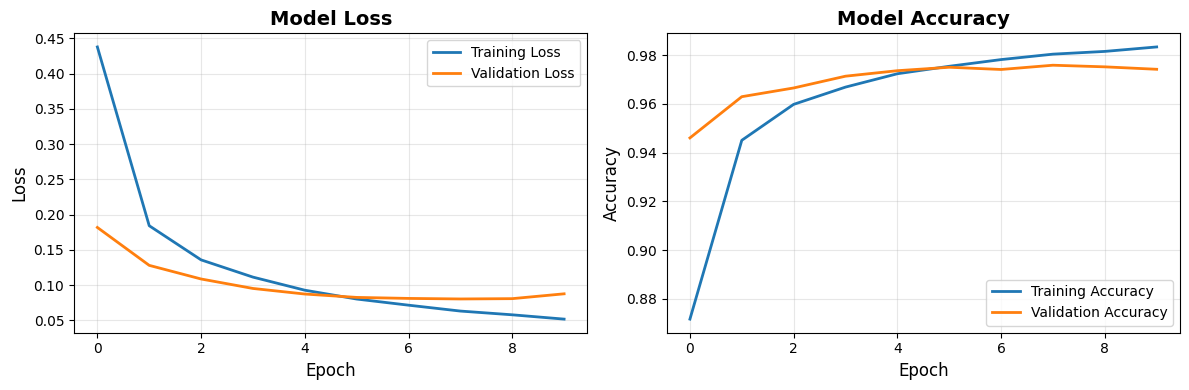

In [19]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Model Loss', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Model Accuracy', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**Evaluate**

In [20]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

Test Loss: 0.0726
Test Accuracy: 0.9787


In [21]:
predictions = model.predict(x_test[:10])
predicted_classes = np.argmax(predictions, axis=1)
print(f"Predictions: {predicted_classes}")
print(f"True labels: {y_test[:10]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Predictions: [7 2 1 0 4 1 4 9 5 9]
True labels: [7 2 1 0 4 1 4 9 5 9]
